# Определение перспективного тарифа для телеком-компании
Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файла

In [1]:
import pandas as pd #импортировали библиотеку pandas
import numpy as np #импорт библиотеки с математическими функциями
import matplotlib.pyplot as plt #импорт библиотеки для построения графиков
from scipy import stats as st #
calls_df = pd.read_csv('/datasets/calls.csv',sep = ',') #прочитали файл и сохранили в переменной data, применив разделитель 
pd.set_option('display.max_columns', None)
display(calls_df.head(10)) # выводим на экран первые 10 строк таблицы
calls_df.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В таблице calls нет пропусков. Тип данных в столбце call_date следует поменять на тип datetime

In [2]:
internet_df = pd.read_csv('/datasets/internet.csv',sep = ',') #прочитали файл и сохранили в переменной data, применив разделитель 
pd.set_option('display.max_columns', None)
display(internet_df.head(10)) # выводим на экран первые 10 строк таблицы
internet_df.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В таблице internet нет пропусков в данных. Есть столбец unnamed:0, который дублирует порядковые номера, его можно удалить. Тип данных в столбце session_date следует заменить на тип данных datetime.

In [3]:
messages_df = pd.read_csv('/datasets/messages.csv',sep = ',') #прочитали файл и сохранили в переменной data, применив разделитель 
pd.set_option('display.max_columns', None)
display(messages_df.head(10)) # выводим на экран первые 10 строк таблицы
messages_df.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице messages нет пропусков. В столбце message_date следует измнеить тип данных на datetime.

In [4]:
tariffs_df = pd.read_csv('/datasets/tariffs.csv',sep = ',') #прочитали файл и сохранили в переменной data, применив разделитель 
pd.set_option('display.max_columns', None)
display(tariffs_df.head(20)) # выводим на экран первые 10 строк таблицы
tariffs_df.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В таблице tariffs тоже нет пропусков. С данными все в порядке.

In [5]:
users_df = pd.read_csv('/datasets/users.csv',sep = ',') #прочитали файл и сохранили в переменной data, применив разделитель 
pd.set_option('display.max_columns', None)
display(users_df.head(10)) # выводим на экран первые 10 строк таблицы
users_df.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В таблице users есть пропуски в столбце churn_date. Пропуски тут логичны и объясняются тем, что пользователь не прекращал пользоваться тарифом на момент выгрузки данных.

Также посмотрим дубликаты в исходных данных

In [6]:
calls_df.duplicated().sum() # поиск дубликатов

0

In [7]:
internet_df.duplicated().sum() # поиск дубликатов

0

In [8]:
users_df.duplicated().sum() # поиск дубликатов

0

In [9]:
messages_df.duplicated().sum() # поиск дубликатов

0

Дубликатов в исходных данных нет.

### Вывод

Данные предоставлены в хорошом виде, остается только изменить тип данных в столбцах с датой.

## Предобработка и подготовка данных

### Обработка данных

In [10]:
users_df.describe() # смотрим описательную статистику

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


В столбце age с возрастом у нас все хорошо, минимальный 18, максимальный 75. Все реально и правдоподобно.

In [11]:
calls_df.describe() # смотрим описательную статистику

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


В столбце duration есть нулевая продложительность разговора. По условию задачи это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

In [12]:
messages_df.describe()# смотрим описательную статистику

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [13]:
internet_df.describe()# смотрим описательную статистику

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


В столбце mb_used есть нули, предполагается, что пользователь не тратил интернет-трафик. Оставляем нули.

In [14]:
#теперь приведем к типу времени столбцы с датой
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d') 
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d') 
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d') 
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d')


In [15]:
users_df.info() #проверяем, что тип изменился

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [16]:
calls_df.info()#проверяем, что тип изменился

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [17]:
messages_df.info()#проверяем, что тип изменился

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [18]:
internet_df.info()#проверяем, что тип изменился

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


Тип данных в столбцах с датой изменился.

Так как нас интересует период месяц, то добавляем столбец month в таблицах calls_df,users_df,messages_df,internet_df

In [19]:
users_df['month'] = pd.DatetimeIndex(users_df['reg_date']).month
calls_df['month'] = pd.DatetimeIndex(calls_df['call_date']).month
messages_df['month'] = pd.DatetimeIndex(messages_df['message_date']).month
internet_df['month'] = pd.DatetimeIndex(internet_df['session_date']).month


Округляем продолжительность разговора в большую сторону, так как оператор округляет секунды до минут

In [20]:
calls_df['duration'] = calls_df['duration'].apply(np.ceil)

In [21]:
users_df.head() #проверили новый столбец 

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5


In [22]:
calls_df.head()#проверили новый столбец и округление

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


In [23]:
messages_df.head()#проверили новый столбец 

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [24]:
internet_df.head()#проверили новый столбец 

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


### Расчет

С помощью сводных таблиц считаем для каждого пользователя:




In [25]:
#-количество сделанных звонков и израсходованных минут разговора по месяцам
calls_for_user = calls_df.pivot_table(index=['user_id','month'], values='duration',aggfunc='sum')
calls_for_user.columns = ['calls_duration']
calls_for_user.head()

calls_duration
user_id month                
1000    5               159.0
        6               172.0
        7               340.0
        8               408.0
        9               466.0

In [26]:
#-объем израсходованного интернет-трафика по месяцам
internet_for_user = internet_df.pivot_table(index=['user_id','month'],values='mb_used',aggfunc='sum')
internet_for_user.columns = ['count_mb']
internet_for_user.tail()

count_mb
user_id month          
1498    10     20579.36
1499    9       1845.75
        10     17788.51
        11     17963.31
        12     13055.58

In [27]:
#-количество отправленных сообщений по месяцам
messages_for_user = messages_df.pivot_table(index=['user_id','month'],values='id',aggfunc='count')
messages_for_user.columns = ['count_message']
messages_for_user.head()

count_message
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57

Соединяем все датасеты

In [28]:
# для удобства приведем название столбцов с тарифами к одному написанию
tariffs_df = tariffs_df.rename(columns={'tariff_name':'tariff'}) 

In [29]:
# соединяем все таблицы методом merge
data = calls_for_user.merge(internet_for_user,on=['user_id','month'],how='outer')
data = data.merge(messages_for_user ,on=['user_id','month'],how='outer')
data['count_gb'] = (data['count_mb'] / 1024).apply(np.ceil)
data = data.reset_index().merge(users_df[['city','user_id','tariff']], on = ['user_id'], how='outer')
data = data.reset_index().merge(tariffs_df,on=['tariff'],how='left')
display(data.head(20))
data.info()

,index,user_id,month,calls_duration,count_mb,count_message,count_gb,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,0,1000,5.0,159.0,2253.49,22.0,3.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1,1000,6.0,172.0,23233.77,60.0,23.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,2,1000,7.0,340.0,14003.64,75.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,3,1000,8.0,408.0,14055.93,81.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,4,1000,9.0,466.0,14568.91,57.0,15.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
5,5,1000,10.0,350.0,14702.49,73.0,15.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
6,6,1000,11.0,338.0,14756.47,58.0,15.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
7,7,1000,12.0,333.0,9817.61,70.0,10.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
8,8,1001,11.0,430.0,18429.34,NaN,18.0,Москва,smart,50,15360,500,550,200,3,3
9,9,1001,12.0,414.0,14036.66,NaN,14.0,Москва,smart,50,15360,500,550,200,3,3


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 16 columns):
index                    3216 non-null int64
user_id                  3216 non-null int64
month                    3214 non-null float64
calls_duration           3174 non-null float64
count_mb                 3203 non-null float64
count_message            2717 non-null float64
count_gb                 3203 non-null float64
city                     3216 non-null object
tariff                   3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
dtypes: float64(5), int64(9), object(2)
memory usage: 427.1+ KB


В итоговой таблице у нас появились пропуски с ключевых столбцах: month,calls_duration,count_gb,count_message. Предполагаю, что просто данный пользователь не пользовался какими-то их предоставленных услуг: не отправлял смс, не звонил или не пользовался интернетом. 

Заполним пропуски нулями

In [30]:
data.fillna({'calls_duration':0,'count_gb':0,'count_mb':0,'count_message':0},inplace=True)
data.isna().sum()

index                    0
user_id                  0
month                    2
calls_duration           0
count_mb                 0
count_message            0
count_gb                 0
city                     0
tariff                   0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

Пропуски в столбце month удалим, это никак не повлияет на дальнейший анализ.

In [31]:
data = data.dropna(subset=['month'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 16 columns):
index                    3214 non-null int64
user_id                  3214 non-null int64
month                    3214 non-null float64
calls_duration           3214 non-null float64
count_mb                 3214 non-null float64
count_message            3214 non-null float64
count_gb                 3214 non-null float64
city                     3214 non-null object
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           3214 non-null int64
dtypes: float64(5), int64(9), object(2)
memory usage: 426.9+ KB


Соединили все необходимые данные в общий датасет, избавились от пропусков, теперь можно приступить к подсчету помесячной выручки с каждого пользователя

In [32]:
# через функцию одной строки считаем выручку и заполняем полученные данные в новый столбец
def get_revenue(row):
    minutes_over = (row['calls_duration'] - row['minutes_included'])*row['rub_per_minute']
    internet_over = ((row['count_gb']-row['mb_per_month_included']/1024))*row['rub_per_gb']
    message_over = (row['count_message']-row['messages_included'])*row['rub_per_message']
    if minutes_over<0:
        minutes_over=0
    if internet_over<0:
        internet_over=0
    if message_over<0:
        message_over=0
    return minutes_over+internet_over+message_over+row['rub_monthly_fee']+message_over
data['revenue'] = data.apply(get_revenue,axis=1)
data.head(10)

,index,user_id,month,calls_duration,count_mb,count_message,count_gb,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,0,1000,5.0,159.0,2253.49,22.0,3.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1,1000,6.0,172.0,23233.77,60.0,23.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,2,1000,7.0,340.0,14003.64,75.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,3,1000,8.0,408.0,14055.93,81.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,4,1000,9.0,466.0,14568.91,57.0,15.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
5,5,1000,10.0,350.0,14702.49,73.0,15.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
6,6,1000,11.0,338.0,14756.47,58.0,15.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
7,7,1000,12.0,333.0,9817.61,70.0,10.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
8,8,1001,11.0,430.0,18429.34,0.0,18.0,Москва,smart,50,15360,500,550,200,3,3,1150.0
9,9,1001,12.0,414.0,14036.66,0.0,14.0,Москва,smart,50,15360,500,550,200,3,3,550.0


### Вывод

В таблице появился новый столбец с помесячной выручкой каждого пользователя.

## Анализ данных

Теперь рассчитываем среднее количество, дисперсию и стандартное отклонение по ключевым столбцам. Строим гистограммы. 

In [33]:
ultra = data.query('tariff=="ultra"') # делаем срез данных по тарифу ultra
ultra

,index,user_id,month,calls_duration,count_mb,count_message,count_gb,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,0,1000,5.0,159.0,2253.49,22.0,3.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1,1000,6.0,172.0,23233.77,60.0,23.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,2,1000,7.0,340.0,14003.64,75.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,3,1000,8.0,408.0,14055.93,81.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,4,1000,9.0,466.0,14568.91,57.0,15.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204,3204,1473,8.0,0.0,12905.40,17.0,13.0,Красноярск,ultra,1000,30720,3000,1950,150,1,1,1950.0
3205,3205,1473,9.0,0.0,17289.85,19.0,17.0,Красноярск,ultra,1000,30720,3000,1950,150,1,1,1950.0
3206,3206,1473,10.0,0.0,13688.65,20.0,14.0,Красноярск,ultra,1000,30720,3000,1950,150,1,1,1950.0
3207,3207,1473,11.0,0.0,21673.80,14.0,22.0,Красноярск,ultra,1000,30720,3000,1950,150,1,1,1950.0


In [34]:
smart = data.query('tariff=="smart"') #делаем срез данных по тарифу smart
smart

,index,user_id,month,calls_duration,count_mb,count_message,count_gb,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
8,8,1001,11.0,430.0,18429.34,0.0,18.0,Москва,smart,50,15360,500,550,200,3,3,1150.0
9,9,1001,12.0,414.0,14036.66,0.0,14.0,Москва,smart,50,15360,500,550,200,3,3,550.0
10,10,1002,6.0,117.0,10856.82,4.0,11.0,Стерлитамак,smart,50,15360,500,550,200,3,3,550.0
11,11,1002,7.0,214.0,17580.10,11.0,18.0,Стерлитамак,smart,50,15360,500,550,200,3,3,1150.0
12,12,1002,8.0,289.0,20319.26,13.0,20.0,Стерлитамак,smart,50,15360,500,550,200,3,3,1550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,3209,1489,8.0,0.0,11050.56,17.0,11.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,550.0
3210,3210,1489,9.0,0.0,17206.30,32.0,17.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,950.0
3211,3211,1489,10.0,0.0,19559.44,21.0,20.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,1550.0
3212,3212,1489,11.0,0.0,17491.56,20.0,18.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,1150.0


In [35]:
# считаем среднее по столбцу calls_duration для двух тарифов
ultra_call_ave = ultra['calls_duration'].mean()
smart_call_ave = smart['calls_duration'].mean()
print('Средняя продолжительность звонков тарифа ultra:',ultra_call_ave)
print('Средняя продолжительность звонков тарифа smart:',smart_call_ave)

Средняя продолжительность звонков тарифа ultra: 526.6233502538071
Средняя продолжительность звонков тарифа smart: 417.9349484073576


In [36]:
# считаем дисперсию по столбцу calls_duration для двух тарифов
ultra_call_var = np.var(ultra['calls_duration'])
smart_call_var = np.var(smart['calls_duration'])
print('Дисперсия продолжительности звонков тарифа ultra:', ultra_call_var)
print('Дисперсия продолжительнсоти звонков тарифа smart:',smart_call_var)

Дисперсия продолжительности звонков тарифа ultra: 100771.2236172022
Дисперсия продолжительнсоти звонков тарифа smart: 36203.06665209469


In [37]:
# считаем стандартное отклонение по столбцу calls_duration для двух тарифов
ultra_call_standart = np.std(ultra['calls_duration'])
smart_call_standart = np.std(smart['calls_duration'])
print('Стандартное отклонение продолжительности звонков тарифа ultra:', ultra_call_standart)
print('Стандартное отклонение продолжительности звонков тарифа ultra:',smart_call_standart)

Стандартное отклонение продолжительности звонков тарифа ultra: 317.44483554974113
Стандартное отклонение продолжительности звонков тарифа ultra: 190.27103471651876


Text(0, 0.5, 'Частота')

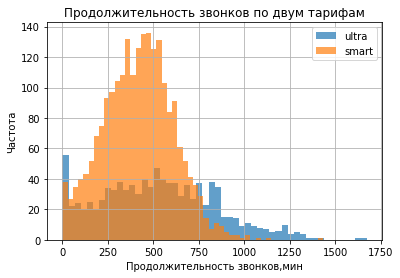

In [38]:
#строим гистограммы
ultra['calls_duration'].plot(kind='hist',bins=50,grid=True,alpha=0.7,label = 'ultra')
smart['calls_duration'].plot(kind='hist',bins=50,grid=True,alpha=0.7,label = 'smart')
plt.legend()
plt.title('Продолжительность звонков по двум тарифам')
plt.xlabel('Продолжительность звонков,мин')
plt.ylabel('Частота')

Средняя продолжительность звонков в тарифв ultra больше, чем у тарифа smart. По стандартного отклонению и дисперсии можно сказать, что у тарифа ultra данные сильнее разбросаны относительно среднего, это можно увидеть и на гистограмме. У тарифа smart распределение можно назвать нормальным, нет сильного разброса в данных.

In [39]:
# считаем среднее по столбцу count_gb для двух тарифов
ultra_internet_ave = ultra['count_gb'].mean()
smart_internet_ave = smart['count_gb'].mean()
print('Среднее потраченного объема интернет-трафика тарифа ultra:', ultra_internet_ave)
print('Среднее потраченного объема интернет-трафика тарифа smart:',smart_internet_ave)

Среднее потраченного объема интернет-трафика тарифа ultra: 19.494416243654822
Среднее потраченного объема интернет-трафика тарифа smart: 16.328847016599372


In [40]:
# считаем дисперсию по столбцу count_gb для двух тарифов
ultra_internet_var = np.var(ultra['count_gb'])
smart_internet_var = np.var(smart['count_gb'])
print('Дисперсия потраченного объема интернет-трафика тарифа ultra:', ultra_internet_var)
print('Дисперсия потраченного объема интернет-трафика тарифа smart:', smart_internet_var)

Дисперсия потраченного объема интернет-трафика тарифа ultra: 96.99311602978692
Дисперсия потраченного объема интернет-трафика тарифа smart: 33.013887454837445


In [41]:
#считаем стандартное отклонение по столбцу count_gb для двух тарифов
ultra_internet_standart = np.std(ultra['count_gb'])
smart_internet_standart = np.std(smart['count_gb'])
print('Стандартное отклонение потраченного объема интернет-трафика тарифа ultra:',ultra_internet_standart)
print('Стандартное отклонение  потраченного объема интернет-трафика тарифа smart:',smart_internet_standart)

Стандартное отклонение потраченного объема интернет-трафика тарифа ultra: 9.848508314957495
Стандартное отклонение  потраченного объема интернет-трафика тарифа smart: 5.745771267187499


Text(0, 0.5, 'Частота')

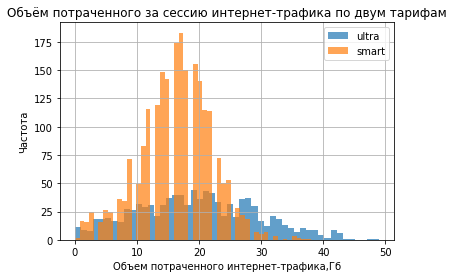

In [42]:
# сторим гистограммы
ultra['count_gb'].plot(kind='hist',bins=50,grid=True,alpha=0.7,label = 'ultra')
smart['count_gb'].plot(kind='hist',bins=50,grid=True,alpha=0.7,label = 'smart')
plt.legend()
plt.title('Объём потраченного за сессию интернет-трафика по двум тарифам')
plt.xlabel('Объем потраченного интернет-трафика,Гб')
plt.ylabel('Частота')

Средний объем интернет-трафика в тарифе ultra тоже больше, чем у тарифа smart. И разброс данных относительно среднего тоже больше. Это видно и по значению дисперсии, стандартного отклонения и на гистограмме. Опять же по тарифу smart распредление можно назвать нормальным.

In [43]:
#считаем среднее по столбцу count_message для двух тарифов
ultra_message_ave = ultra['count_message'].mean()
smart_message_ave = smart['count_message'].mean()
print('Среднее количество отправленных сообщений в тарифе ultra:', ultra_message_ave)
print('Среднее количество отправленных сообщений в тарифе smart:',smart_message_ave)

Среднее количество отправленных сообщений в тарифе ultra: 49.36345177664975
Среднее количество отправленных сообщений в тарифе smart: 33.384028712427096


In [44]:
#считаем дисперсию по столбцу count_message для двух тарифов
ultra_message_var = np.var(ultra['count_message'])
smart_message_var = np.var(smart['count_message'])
print('Дисперсия количества отправленных сообщений в тарифе ultra:', ultra_message_var)
print('Дисперсия количества отправленных сообщений в тарифе smart:', smart_message_var)

Дисперсия количества отправленных сообщений в тарифе ultra: 2282.946075394882
Дисперсия количества отправленных сообщений в тарифе smart: 796.455482917076


In [45]:
#считаем стандартное отклонение по столбцу count_message для двух тарифов
ultra_message_standart = np.std(ultra['count_message'])
smart_message_standart = np.std(smart['count_message'])
print('Стандартное отклонение количества отправленных сообщений в тарифе ultra:', ultra_message_standart)
print('Стандартное отклонение количества отправленных сообщений в тарифе smart:', smart_message_standart)

Стандартное отклонение количества отправленных сообщений в тарифе ultra: 47.78018496610161
Стандартное отклонение количества отправленных сообщений в тарифе smart: 28.221542886898938


Text(0, 0.5, 'Частота')

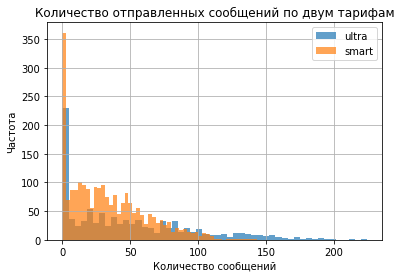

In [46]:
# строим гистограммы
ultra['count_message'].plot(kind='hist',bins=50,grid=True,alpha=0.7,label = 'ultra')
smart['count_message'].plot(kind='hist',bins=50,grid=True,alpha=0.7,label = 'smart')
plt.legend()
plt.title('Количество отправленных сообщений по двум тарифам')
plt.xlabel('Количество сообщений')
plt.ylabel('Частота')

Такая же ситуация и по количество сообщений, в тарифе ultra больше среднее значение и разброс данных относительно среднего. Но нормальным ни одно распредление назвать нельзя. Много значений, которые близятся к нулю. Это логично, так как смсками сейчас пользуются не так много людей, как раньше.

### Вывод

Пользователи тарифа smart тратят меньше минут, интернета и смс-сообщений, чем пользователи тарифа ultra. Это вполне логично, так как так в пакет тарифа smart включено меньше минут, Гб и смс. И пользователи стараются не выходит за предоставленные лимиты. Хотя средний интернет трафик выше, чем предоставленный лимит на тарифе smart. На тарифе ultra значения сильно разбросы относительно среднего значения, можно предположить, что кому-то из абонентов тарифа ultra хватит лимитов тарифа smart, а кому-то не хватает и своих.

## Проверка гипотез

Проверяем гипотезу
средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются



H0: средняя выручка по тарифам равна 

H1: средняя выручка по тарифам не равна

In [47]:
ultra_revenue = ultra['revenue'] # выбираем столбец с выручкой
smart_revenue = smart['revenue'] # выбираем столбец с выручкой
alpha = .05 #критический уровень статистической значимости
results = st.ttest_ind(ultra_revenue,smart_revenue,equal_var = False) #проверяем гипотезу о равенстве средних двух независимых совокупностей
print('p-значение:', results.pvalue) 

if results.pvalue < alpha: #сравниваем получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3313508661750799e-238
Отвергаем нулевую гипотезу


Для подтверждения и наглядности посчитаем среднее и построим гистограмму

In [48]:
ultra_revenue_ave = ultra['revenue'].mean() # средняя выручка тарифа ultra
smart_revenue_ave = smart['revenue'].mean() #средняя выручка тарифа smart
print(ultra_revenue_ave)
print(smart_revenue_ave)

2070.1522842639592
1307.3732615522656


Text(0, 0.5, 'Частота')

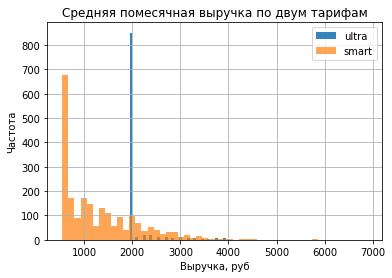

In [49]:
ultra_revenue.plot(kind='hist',bins=50,grid=True,alpha=0.9,label = 'ultra')
smart_revenue.plot(kind='hist',bins=50,grid=True,alpha=0.7,label = 'smart')
plt.legend()
plt.title('Средняя помесячная выручка по двум тарифам')
plt.xlabel('Выручка, руб')
plt.ylabel('Частота')

Итак, действительно средняя выручка не равно, выручка тарифа ultra больше.

Проверяем гипотезу средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

H0: средняя выручка Москвы и других регионов равна

H1: средняя выручка Москвы и других регионов​ не равна

In [50]:
revenue_moscow = data[data['city']=='Москва']['revenue']  #делаем срез выручка по Москве
revenue_region = data[data['city']!='Москва']['revenue']  #делаем срез выручки все, кроме  Москвы

In [51]:
alpha = .05 #критический уровень статистической значимости
results = st.ttest_ind(revenue_moscow,revenue_region,equal_var = False)#проверяем гипотезу о равенстве средних двух независимых совокупностей
print('p-значение:', results.pvalue) 


if results.pvalue < alpha: #сравниваем получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6373733901910718
Не получилось отвергнуть нулевую гипотезу


Для подтверждения и наглядности посчитаем среднее и построим гистограмму

In [52]:
revenue_moscow_ave = revenue_moscow.mean() # средняя выручка по Москве
revenue_region_ave = revenue_region.mean() #средняя выручка остальных регионов
print(revenue_moscow_ave)
print(revenue_region_ave)

1554.2504091653027
1538.0668459469844


Text(0, 0.5, 'Частота')

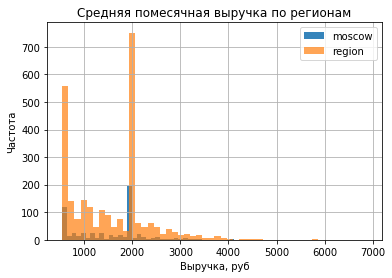

In [53]:
revenue_moscow.plot(kind='hist',bins=50,grid=True,alpha=0.9,label = 'moscow')
revenue_region.plot(kind='hist',bins=50,grid=True,alpha=0.7,label = 'region')
plt.legend()
plt.title('Средняя помесячная выручка по регионам')
plt.xlabel('Выручка, руб')
plt.ylabel('Частота')

Действительно средняя выручка по Москве почти не отличается от средней выручке по регионам.

### Вывод

При проверки гипотез о равенстве средних двух генеральных совокупностей, мы выяснили, что средняя выручка по тарифу ultra больше, чем по тарифу smart. Но разницы в выручке в регионах от выручке в Москве в среднем не наблюдается. 

## Общий вывод

На основании предоставленных данных о 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год, мы проанализировали поведение клиентов, посчитали выручку по каждому пользователю, сравнили два тарифа. Можно сделать вывод, что тариф ultra приносит больше выручки, чем тариф smart. То есть он более выгодный для оператора. Также мы увидели, что выручка Москвы не отличается от выручки в остальных регионах. 